In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df=pd.read_csv("testing1.csv")

In [3]:
df


,x1,x2,result
0,1,2,3
1,0,1,1
2,2,2,4
3,7,54,61
4,5,7,12
5,56,45,101
6,54,5,59
7,545,45,590
8,54,45,99
9,5,45,50


In [4]:
df.isnull()

,x1,x2,result
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [5]:
df.corr()

,x1,x2,result
x1,1.000000,0.123543,0.928957
x2,0.123543,1.000000,0.482119
result,0.928957,0.482119,1.000000


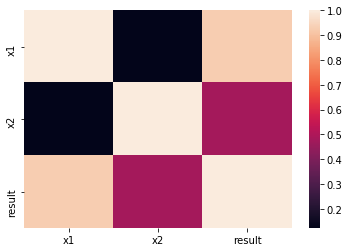

In [7]:
sn.heatmap(df.corr())

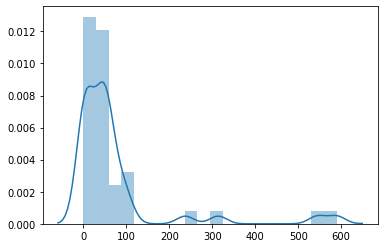

In [8]:
sn.distplot(df)

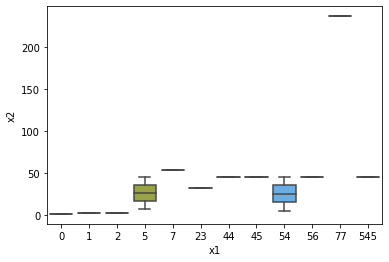

In [10]:
sn.boxplot(x="x1",y="x2",data=df)

In [13]:
x=df.iloc[:,:-1] #independentfeature
y=df.iloc[:,-1] #dependentfeature

In [14]:
x

,x1,x2
0,1,2
1,0,1
2,2,2
3,7,54
4,5,7
5,56,45
6,54,5
7,545,45
8,54,45
9,5,45


In [15]:
y


0       3
1       1
2       4
3      61
4      12
5     101
6      59
7     590
8      99
9      50
10     90
11     89
12     55
13    314
Name: result, dtype: int64

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [19]:
lr=LinearRegression()

In [20]:
mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=10)
mean_mse=np.mean(mse)

In [21]:
print(mean_mse)

-3.294599300862616e-27


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=0)

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [29]:
l=Lasso()

In [30]:
parameter={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,0,1,3,10,25,50,70,100,120,150,160,175,200,250]}

In [31]:
msel=GridSearchCV(l,parameter,scoring='neg_mean_squared_error',cv=10)

In [32]:
msel.fit(x,y)

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does n

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 0, 1,
                                   3, 10, 25, 50, 70, 100, 120, 150, 160, 175,
                                   200, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [33]:
msel.best_score_

-0.00010264522809725558

In [34]:
msel.best_params_

{'alpha': 0.01}

In [35]:
predictionl=msel.predict(xtest)

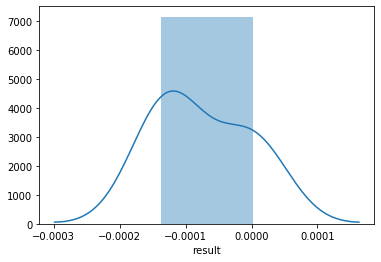

In [36]:
sn.distplot(ytest-predictionl)

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [38]:
rg=Ridge()

In [39]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,3,10,25,50,70,100,120,150,160,175,200,250]}

In [40]:
mser=GridSearchCV(rg,parameters,scoring='neg_mean_squared_error',cv=10)

In [41]:
mser.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 3,
                                   10, 25, 50, 70, 100, 120, 150, 160, 175, 200,
                                   250]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [42]:
mser.best_score_

-1.2540995126841558e-26

In [45]:
pedictionr=mser.predict(xtest)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

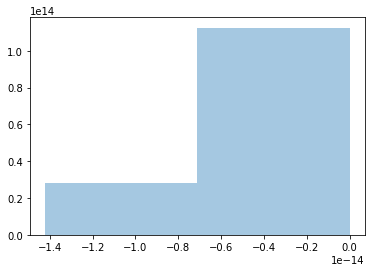

In [47]:
sn.distplot(ytest-pedictionr)

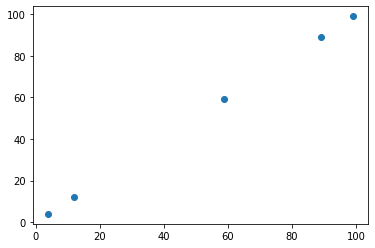

In [48]:
plt.scatter(ytest,predictionl)

In [49]:
import pickle

In [55]:
f=open("testings.pkl",'wb')
pickle.dump(msel,f)